In [27]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
x = df.drop(columns="label")
x.shape

(42000, 784)

In [6]:
y= df['label']
y.shape

(42000,)

In [7]:
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [8]:
x_train ,X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
clf = DecisionTreeClassifier(criterion='entropy')

In [10]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
y_pred = clf.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.8608333333333333

In [13]:
y_test.iloc[0]

3

In [14]:
m = list(X_test.iloc[0,:])
n = np.array([m])

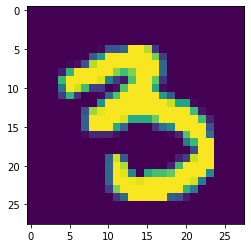

In [15]:
plt.imshow(n.reshape(28,28))
#print(y_pred)

In [16]:
y_pred

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [17]:
param_list = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random']
}

In [18]:
grid = GridSearchCV(clf,param_grid=param_list,cv=10,n_jobs=-1)

In [19]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [20]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [21]:
grid.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [22]:
grid.cv_results_

{'mean_fit_time': array([25.74326973, 20.89721611, 20.45688515, 11.05337207]),
 'std_fit_time': array([0.7913671 , 0.8572414 , 1.02710816, 1.4762578 ]),
 'mean_score_time': array([0.13850007, 0.05877414, 0.04182436, 0.03603301]),
 'std_score_time': array([0.04954799, 0.02288587, 0.01753093, 0.01530854]),
 'param_criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_splitter': masked_array(data=['best', 'random', 'best', 'random'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'splitter': 'best'},
  {'criterion': 'gini', 'splitter': 'random'},
  {'criterion': 'entropy', 'splitter': 'best'},
  {'criterion': 'entropy', 'splitter': 'random'}],
 'split0_test_score': array([0.84761905, 0.8577381 , 0.86130952, 0.85357143]),
 'split1_test_score': array([0.84791667, 0.85297619, 0.8529

In [23]:
grid.best_score_

0.8587797619047619

[Text(0.44005415846630835, 0.9772727272727273, 'X[461] <= 0.5\nentropy = 3.32\nsamples = 33600\nvalue = [3319, 3723, 3317, 3488, 3245, 3039, 3296, 3502, 3295\n3376]'),
 Text(0.1853904133778503, 0.9318181818181818, 'X[378] <= 5.5\nentropy = 2.879\nsamples = 13216\nvalue = [3224, 117, 460, 2409, 510, 1881, 866, 2367, 322\n1060]'),
 Text(0.09178078651280001, 0.8863636363636364, 'X[597] <= 0.5\nentropy = 2.12\nsamples = 6811\nvalue = [3019, 13, 270, 166, 142, 303, 505, 2211, 7, 175]'),
 Text(0.05379903389284842, 0.8409090909090909, 'X[514] <= 1.0\nentropy = 1.759\nsamples = 3118\nvalue = [224, 5, 56, 24, 137, 89, 325, 2088, 6, 164]'),
 Text(0.03609059648304803, 0.7954545454545454, 'X[155] <= 0.5\nentropy = 0.974\nsamples = 2385\nvalue = [81, 5, 27, 18, 48, 57, 24, 2050, 4, 71]'),
 Text(0.027553203889962033, 0.75, 'X[433] <= 2.5\nentropy = 0.612\nsamples = 2225\nvalue = [22, 1, 14, 8, 39, 21, 12, 2044, 0, 64]'),
 Text(0.022245997912919913, 0.7045454545454546, 'X[538] <= 9.5\nentropy = 0.413

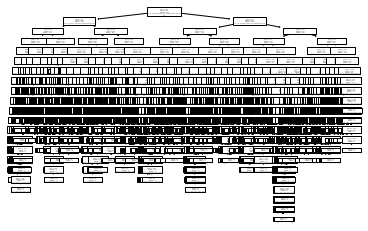

In [26]:
rcParams['figure.figsize'] =80,50
plot_tree(clf)